<a href="https://colab.research.google.com/github/bilalProgTech/btech-nmims/blob/master/NN-DL/Lab-Work/20230924-Lab-8-1-BTech-NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign
!kaggle datasets download -d gaborfodor/keras-pretrained-models

100% 324M/325M [00:17<00:00, 21.6MB/s]
100% 325M/325M [00:17<00:00, 19.4MB/s]
100% 943M/943M [00:51<00:00, 21.8MB/s]
100% 943M/943M [00:51<00:00, 19.4MB/s]


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip
!unzip keras-pretrained-models.zip

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from IPython.display import Image, display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!nvidia-smi

Sat Sep 23 11:06:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

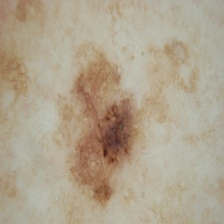

In [ ]:
display(Image('/content/train/malignant/10.jpg'))

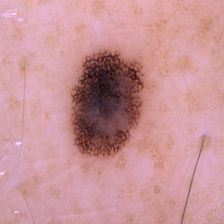

In [ ]:
display(Image('/content/train/benign/100.jpg'))

In [ ]:
import os

In [ ]:
files = []
for dirname, _, filenames in os.walk('/content/train'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

train = pd.DataFrame({'filename': files})
train['class'] = train['filename'].str.split('/').str[-2]
train = train.sample(frac=1)
train = train.reset_index(drop=True)
train.head()

,filename,class
0,/content/train/benign/601.jpg,benign
1,/content/train/benign/1156.jpg,benign
2,/content/train/malignant/441.jpg,malignant
3,/content/train/benign/617.jpg,benign
4,/content/train/benign/416.jpg,benign


In [ ]:
files = []
for dirname, _, filenames in os.walk('/content/test'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

test = pd.DataFrame({'filename': files})
test['class'] = test['filename'].str.split('/').str[-2]
test = test.sample(frac=1)
test = test.reset_index(drop=True)
test.head()

,filename,class
0,/content/test/benign/226.jpg,benign
1,/content/test/malignant/519.jpg,malignant
2,/content/test/benign/1231.jpg,benign
3,/content/test/malignant/1012.jpg,malignant
4,/content/test/benign/1139.jpg,benign


In [ ]:
train.shape, test.shape

((2637, 2), (660, 2))

Image Data Generator

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory='/content/train',
                                                    target_size=(128, 128),
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test,
                                                  directory='/content/test',
                                                  target_size=(128, 128),
                                                  class_mode='binary') #categorical

Found 2637 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


# Basic CNN model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 16)                2

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
83/83 [==============================] - 19s 90ms/step - loss: 0.5350 - accuracy: 0.7122 - val_loss: 0.4436 - val_accuracy: 0.7879
Epoch 2/10
83/83 [==============================] - 8s 91ms/step - loss: 0.4488 - accuracy: 0.7766 - val_loss: 0.4090 - val_accuracy: 0.7939
Epoch 3/10
83/83 [==============================] - 6s 72ms/step - loss: 0.4126 - accuracy: 0.7952 - val_loss: 0.4216 - val_accuracy: 0.7712
Epoch 4/10
83/83 [==============================] - 7s 83ms/step - loss: 0.4191 - accuracy: 0.7941 - val_loss: 0.3698 - val_accuracy: 0.8227
Epoch 5/10
83/83 [==============================] - 7s 88ms/step - loss: 0.4092 - accuracy: 0.7876 - val_loss: 0.3988 - val_accuracy: 0.7894
Epoch 6/10
83/83 [==============================] - 7s 78ms/step - loss: 0.3737 - accuracy: 0.8157 - val_loss: 0.3692 - val_accuracy: 0.8091
Epoch 7/10
83/83 [==============================] - 7s 89ms/step - loss: 0.3641 - accuracy: 0.8172 - val_loss: 0.3820 - val_accuracy: 0.7879
Epoch 8/10
8

In [ ]:
model.evaluate(test_generator)

21/21 [==============================] - 1s 56ms/step - loss: 0.3616 - accuracy: 0.8152


[0.3616083264350891, 0.8151515126228333]

# VGG 16

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                horizontal_flip=True,
                                                                fill_mode = 'nearest',
                                                                rotation_range=40)

train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory='/content/train',
                                                    target_size=(image_size, image_size),
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test,
                                                  directory='/content/test',
                                                  target_size=(image_size, image_size),
                                                  class_mode='binary') #categorical

weight_path = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_base_model = VGG16(weights=weight_path,
                         include_top=False,
                         input_shape=(image_size, image_size, 3))

for layer in vgg16_base_model.layers:
    layer.trainable = False

vgg16_pretrained_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
vgg16_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_pretrained_model.summary()

Found 2637 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)
history = vgg16_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[callback])

Epoch 1/10
83/83 [==============================] - 42s 491ms/step - loss: 0.4891 - accuracy: 0.7691 - val_loss: 0.3739 - val_accuracy: 0.8273
Epoch 2/10
83/83 [==============================] - 50s 608ms/step - loss: 0.3836 - accuracy: 0.8256 - val_loss: 0.3639 - val_accuracy: 0.8455
Epoch 3/10
83/83 [==============================] - 41s 489ms/step - loss: 0.3669 - accuracy: 0.8309 - val_loss: 0.3694 - val_accuracy: 0.8470
Epoch 4/10
83/83 [==============================] - 41s 490ms/step - loss: 0.3501 - accuracy: 0.8464 - val_loss: 0.3505 - val_accuracy: 0.8424
Epoch 5/10
83/83 [==============================] - 43s 514ms/step - loss: 0.3269 - accuracy: 0.8426 - val_loss: 0.3308 - val_accuracy: 0.8576
Epoch 6/10
83/83 [==============================] - 41s 491ms/step - loss: 0.3209 - accuracy: 0.8517 - val_loss: 0.3545 - val_accuracy: 0.8530
Epoch 7/10
83/83 [==============================] - 40s 486ms/step - loss: 0.3010 - accuracy: 0.8646 - val_loss: 0.3397 - val_accuracy: 0.8515

In [ ]:
vgg16_pretrained_model.evaluate(test_generator)

21/21 [==============================] - 3s 126ms/step - loss: 0.3485 - accuracy: 0.8500


[0.34854504466056824, 0.8500000238418579]

In [ ]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                horizontal_flip=True,
                                                                fill_mode = 'nearest',
                                                                rotation_range=40)

train_generator = train_datagen.flow_from_directory('/content/train',
                                                    target_size=(image_size, image_size),
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory('/content/test',
                                                    target_size=(image_size, image_size),
                                                    class_mode='binary') #categorical

weight_path = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_base_model = VGG16(weights=weight_path,
                         include_top=False,
                         input_shape=(image_size, image_size, 3))

for layer in vgg16_base_model.layers:
    layer.trainable = True

vgg16_pretrained_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
vgg16_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_pretrained_model.summary()
history = vgg16_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator)
vgg16_pretrained_model.evaluate(test_generator)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 14739777 (56.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
83/83 [==============================] - 58s 622ms/step - loss: 1.8390 - accuracy: 0.5226 - val_loss: 0.7093 - val_accuracy: 0.5455
Epoch 2/10
83/83 [==============================] - 

[0.6892139315605164, 0.5454545617103577]

# InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
tf.keras.backend.clear_session()

image_size = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                horizontal_flip=True,
                                                                fill_mode = 'nearest',
                                                                rotation_range=40)

train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory='/content/train',
                                                    target_size=(image_size, image_size),
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test,
                                                  directory='/content/test',
                                                  target_size=(image_size, image_size),
                                                  class_mode='binary') #categorical

Found 2637 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [ ]:
weight_path = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inception_base_model = InceptionV3(weights=weight_path,
                                   include_top=False,
                                   input_shape=(image_size, image_size, 3))

for layer in inception_base_model.layers:
    layer.trainable = False

inception_pretrained_model = tf.keras.Sequential([
    inception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
inception_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
inception_pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1)                 51201     
                                                                 
Total params: 21853985 (83.37 MB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
history = inception_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
83/83 [==============================] - 48s 524ms/step - loss: 1.1331 - accuracy: 0.7471 - val_loss: 0.5830 - val_accuracy: 0.8197
Epoch 2/10
83/83 [==============================] - 39s 470ms/step - loss: 0.7263 - accuracy: 0.7945 - val_loss: 0.7432 - val_accuracy: 0.8121
Epoch 3/10
83/83 [==============================] - 39s 468ms/step - loss: 0.6809 - accuracy: 0.8286 - val_loss: 0.8267 - val_accuracy: 0.7788
Epoch 4/10
83/83 [==============================] - 41s 490ms/step - loss: 0.6327 - accuracy: 0.8237 - val_loss: 0.6804 - val_accuracy: 0.8136
Epoch 5/10
83/83 [==============================] - 39s 472ms/step - loss: 0.5303 - accuracy: 0.8563 - val_loss: 0.7467 - val_accuracy: 0.8121
Epoch 6/10
83/83 [==============================] - 38s 460ms/step - loss: 0.5112 - accuracy: 0.8529 - val_loss: 0.8826 - val_accuracy: 0.7833
Epoch 7/10
83/83 [==============================] - 40s 486ms/step - loss: 0.4083 - accuracy: 0.8787 - val_loss: 0.6017 - val_accuracy: 0.8106

In [ ]:
inception_pretrained_model.evaluate(test_generator)

21/21 [==============================] - 5s 112ms/step - loss: 0.9701 - accuracy: 0.8000


[0.9701110124588013, 0.800000011920929]

# Xception

In [ ]:
from keras.applications.xception import Xception

In [ ]:
tf.keras.backend.clear_session()

image_size = 299

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                horizontal_flip=True,
                                                                fill_mode = 'nearest',
                                                                rotation_range=40)

train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                    directory='/content/train',
                                                    target_size=(image_size, image_size),
                                                    class_mode='binary') #categorical

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_dataframe(dataframe=test,
                                                  directory='/content/test',
                                                  target_size=(image_size, image_size),
                                                  class_mode='binary') #categorical

Found 2637 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [ ]:
weight_path = '/content/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
xception_base_model = Xception(weights=weight_path,
                         include_top=False,
                         input_shape=(image_size, image_size, 3))

for layer in xception_base_model.layers:
    layer.trainable = False

xception_pretrained_model = tf.keras.Sequential([
    xception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xception_pretrained_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xception_pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 1)                 204801    
                                                                 
Total params: 21066281 (80.36 MB)
Trainable params: 204801 (800.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)
history = xception_pretrained_model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callback)

Epoch 1/10
83/83 [==============================] - 76s 866ms/step - loss: 1.3627 - accuracy: 0.7641 - val_loss: 0.8952 - val_accuracy: 0.8121
Epoch 2/10
83/83 [==============================] - 71s 854ms/step - loss: 0.8640 - accuracy: 0.8350 - val_loss: 0.8741 - val_accuracy: 0.8015
Epoch 3/10
83/83 [==============================] - 71s 855ms/step - loss: 0.9006 - accuracy: 0.8430 - val_loss: 1.2535 - val_accuracy: 0.7879
Epoch 4/10
83/83 [==============================] - 72s 857ms/step - loss: 0.8294 - accuracy: 0.8532 - val_loss: 1.0906 - val_accuracy: 0.8106
Epoch 5/10
83/83 [==============================] - 70s 838ms/step - loss: 1.0496 - accuracy: 0.8415 - val_loss: 1.6853 - val_accuracy: 0.7833
Epoch 6/10
83/83 [==============================] - 71s 849ms/step - loss: 0.7062 - accuracy: 0.8809 - val_loss: 1.0202 - val_accuracy: 0.8136
Epoch 7/10
83/83 [==============================] - 73s 884ms/step - loss: 0.6813 - accuracy: 0.8794 - val_loss: 1.1794 - val_accuracy: 0.8515

In [ ]:
xception_pretrained_model.evaluate(test_generator)

21/21 [==============================] - 5s 218ms/step - loss: 1.3625 - accuracy: 0.7955


[1.362510323524475, 0.7954545617103577]